<a href="https://colab.research.google.com/github/Apoorv-Krishn-DAS/Apoorv-Krishn-DAS/blob/main/Prediction_Of_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction_Of_Diabetes**

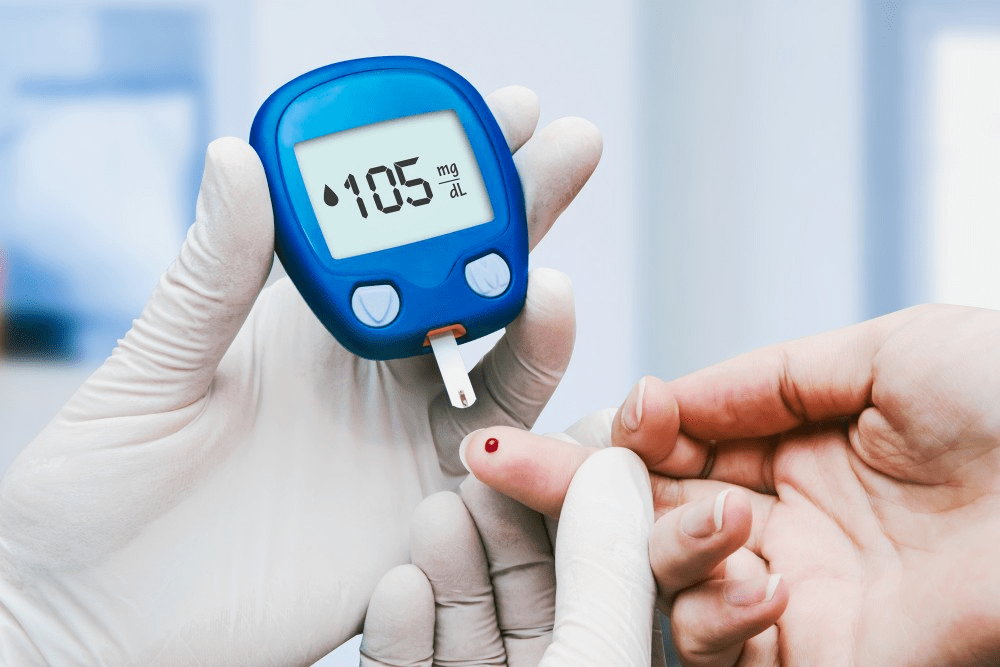

**Importing Required Libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

**Importing CSV File**

In [8]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


**Shape of Dataset**

In [9]:
df.shape

(100000, 9)

**Checking Null Counts**

In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**Duplicate Values Count**

In [11]:
df.duplicated().sum()

3854

**Remove Duplicate Values**

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(96146, 9)

**Columns in DataFrame**

In [14]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

**Unique Values in Given Columns**

In [15]:
columns = ["gender", "hypertension", "heart_disease", "smoking_history", "diabetes"]

for col in columns:
    print(col, df[col].unique())

gender ['Female' 'Male' 'Other']
hypertension [0 1]
heart_disease [1 0]
smoking_history ['never' 'No Info' 'current' 'former' 'ever' 'not current']
diabetes [0 1]


In [16]:
df[df['gender'] == "Other"].shape

(18, 9)

In [17]:
df[df['smoking_history'] == "No Info"].shape

(32887, 9)

In [18]:
df[df['smoking_history'] == "not current"].shape

(6367, 9)

In [19]:
df[df['smoking_history'] == "former"].shape

(9299, 9)

**Summary of DataFrame**

In [20]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


**Smoking History Distribution**

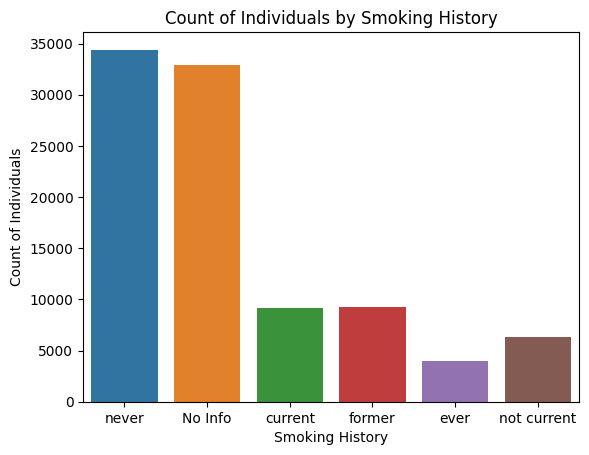

In [21]:
sns.countplot(x='smoking_history', data=df)
plt.title('Count of Individuals by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count of Individuals')
plt.show()

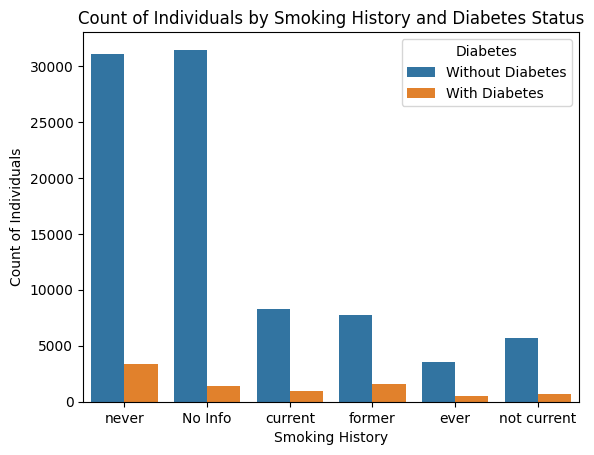

In [22]:
# Filter data based on Smoking history and diabetes status
never1 = df[(df['smoking_history'] == 'never') & (df['diabetes'] == 1)]
never0 = df[(df['smoking_history'] == 'never') & (df['diabetes'] == 0)]
noinfo1 = df[(df['smoking_history'] == 'No Info') & (df['diabetes'] == 1)]
noinfo0 = df[(df['smoking_history'] == 'No Info') & (df['diabetes'] == 0)]
current1 = df[(df['smoking_history'] == 'current') & (df['diabetes'] == 1)]
current0 = df[(df['smoking_history'] == 'current') & (df['diabetes'] == 0)]
former1 = df[(df['smoking_history'] == 'former') & (df['diabetes'] == 1)]
former0 = df[(df['smoking_history'] == 'former') & (df['diabetes'] == 0)]
ever1 = df[(df['smoking_history'] == 'ever') & (df['diabetes'] == 1)]
ever0 = df[(df['smoking_history'] == 'ever') & (df['diabetes'] == 0)]
notcurrent1 = df[(df['smoking_history'] == 'not current') & (df['diabetes'] == 1)]
notcurrent0 = df[(df['smoking_history'] == 'not current') & (df['diabetes'] == 0)]

# Combine the filtered data into a single DataFrame
smoking_history_df = pd.concat([never1, never0, noinfo1, noinfo0, current1, current0, former1, former0, ever1, ever0, notcurrent1, notcurrent0])

# Create the histogram
sns.countplot(x='smoking_history', hue='diabetes', data=smoking_history_df)
plt.xlabel('Smoking History')
plt.ylabel('Count of Individuals')
plt.title('Count of Individuals by Smoking History and Diabetes Status')
plt.legend(title='Diabetes', labels=['Without Diabetes', 'With Diabetes'])
plt.show()

**Gender Distribution**

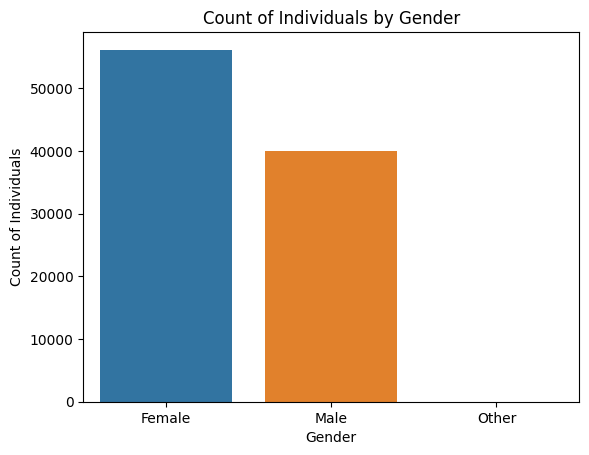

In [23]:
sns.countplot(x='gender', data=df)
plt.title('Count of Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Individuals')
plt.show()

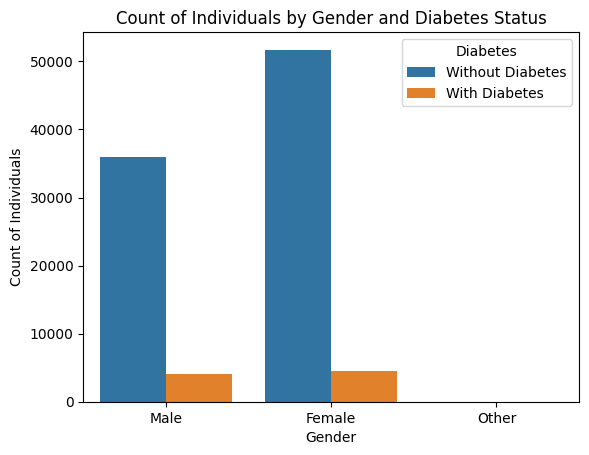

In [24]:
# Filter data based on gender and diabetes status
male1 = df[(df['gender'] == 'Male') & (df['diabetes'] == 1)]
male0 = df[(df['gender'] == 'Male') & (df['diabetes'] == 0)]
female1 = df[(df['gender'] == 'Female') & (df['diabetes'] == 1)]
female0 = df[(df['gender'] == 'Female') & (df['diabetes'] == 0)]
other1 = df[(df['gender'] == 'Other') & (df['diabetes'] == 1)]
other0 = df[(df['gender'] == 'Other') & (df['diabetes'] == 0)]

# Combine the filtered data into a single DataFrame
gender_df = pd.concat([male1, male0, female1, female0, other1, other0])

# Create the histogram using Seaborn
sns.countplot(x='gender', hue='diabetes', data=gender_df)
plt.xlabel('Gender')
plt.ylabel('Count of Individuals')
plt.title('Count of Individuals by Gender and Diabetes Status')
plt.legend(title='Diabetes', labels=['Without Diabetes', 'With Diabetes'])
plt.show()

**Age Distribution**

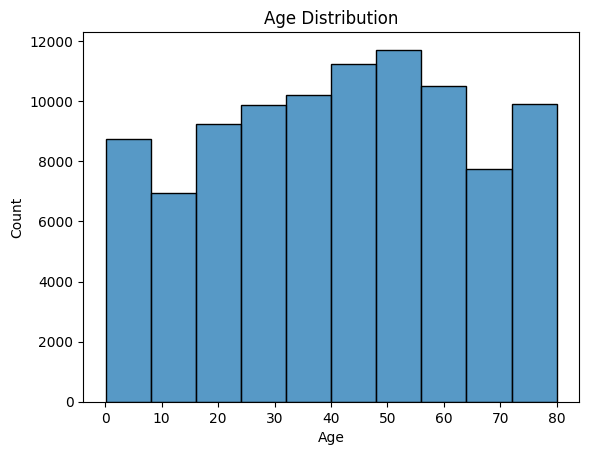

In [25]:
sns.histplot(df['age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

We have age range from 0 to 80.

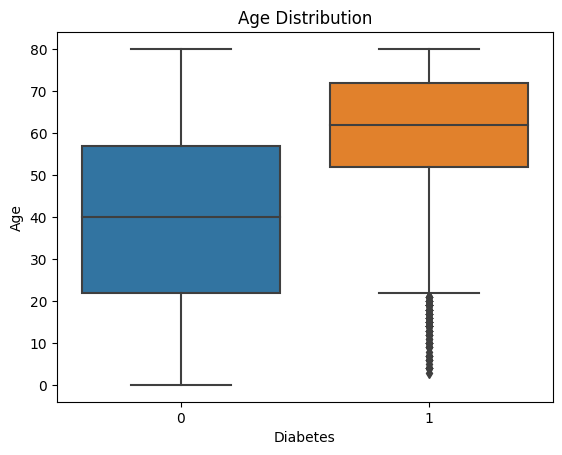

In [26]:
sns.boxplot(x=df['diabetes'], y=df['age'])
plt.title('Age Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.show()

Age-related changes, sedentary lifestyles, higher body weight, genetic factors, concurrent medical illnesses, certain medications, poor food, chronic inflammation, and decreased awareness and screening make older people more vulnerable to diabetes. Age-related changes in lifestyle, consistent exercise, a balanced diet, and the right medical treatment can help lower the risk of and manage diabetes.

**Hypertension Distribution**

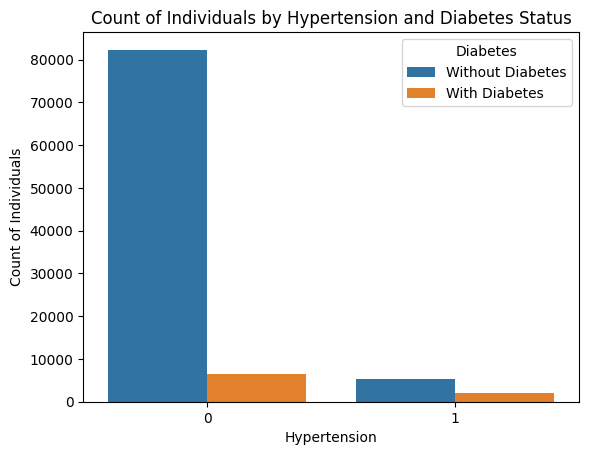

In [27]:
# Filter data based on hypertension and diabetes status
hypertension1 = df[(df['hypertension'] == 1) & (df['diabetes'] == 1)]
hypertension0 = df[(df['hypertension'] == 1) & (df['diabetes'] == 0)]
nohypertension1 = df[(df['hypertension'] == 0) & (df['diabetes'] == 1)]
nohypertension0 = df[(df['hypertension'] == 0) & (df['diabetes'] == 0)]

# Combine the filtered data into a single DataFrame
hypertension_df = pd.concat([hypertension1, hypertension0, nohypertension1, nohypertension0])

# Create the histogram using Seaborn
sns.countplot(x='hypertension', hue='diabetes', data=hypertension_df)
plt.xlabel('Hypertension')
plt.ylabel('Count of Individuals')
plt.title('Count of Individuals by Hypertension and Diabetes Status')
plt.legend(title='Diabetes', labels=['Without Diabetes', 'With Diabetes'])
plt.show()

People with hypertension are more susceptible to diabetes.

**Heart Disease Distribution**

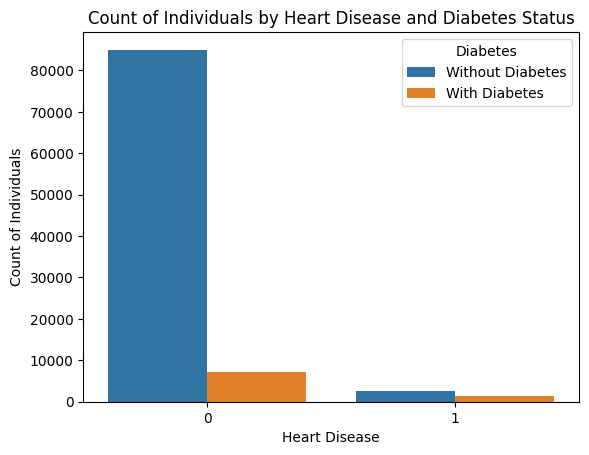

In [28]:
# Filter data based on heart_disease and diabetes status
heart_disease1 = df[(df['heart_disease'] == 1) & (df['diabetes'] == 1)]
heart_disease0 = df[(df['heart_disease'] == 1) & (df['diabetes'] == 0)]
no_heart_disease1 = df[(df['heart_disease'] == 0) & (df['diabetes'] == 1)]
no_heart_disease0 = df[(df['heart_disease'] == 0) & (df['diabetes'] == 0)]

# Combine the filtered data into a single DataFrame
heart_disease_df = pd.concat([heart_disease1, heart_disease0, no_heart_disease1, no_heart_disease0])

# Create the histogram using Seaborn
sns.countplot(x='heart_disease', hue='diabetes', data=heart_disease_df)
plt.xlabel('Heart Disease')
plt.ylabel('Count of Individuals')
plt.title('Count of Individuals by Heart Disease and Diabetes Status')
plt.legend(title='Diabetes', labels=['Without Diabetes', 'With Diabetes'])
plt.show()

People with heart disease are more susceptible to diabetes.

**BMI Distribution**

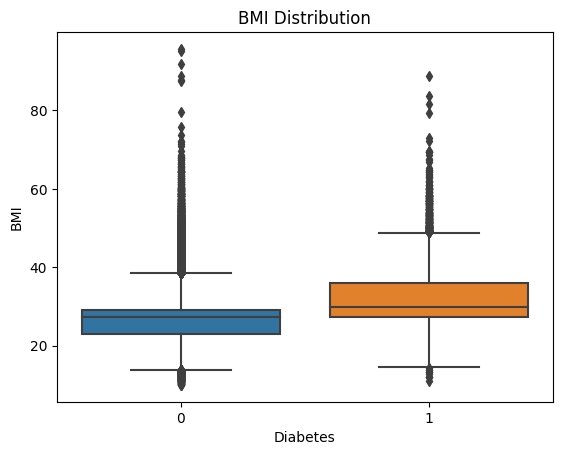

In [29]:
sns.boxplot(x=df['diabetes'], y=df['bmi'])
plt.title('BMI Distribution')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.show()

**HbA1c Level Distribution**

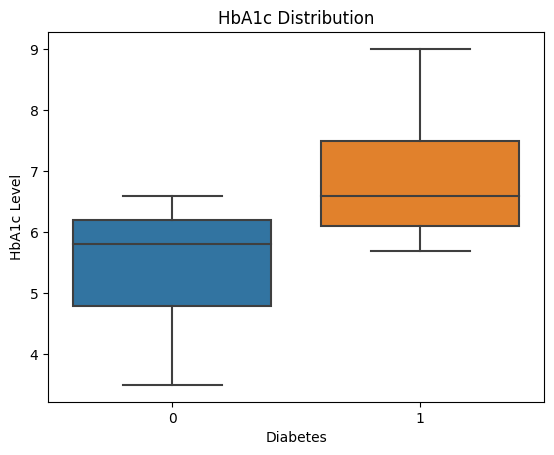

In [30]:
sns.boxplot(x=df['diabetes'], y=df['HbA1c_level'])
plt.title('HbA1c Distribution')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.show()

**Blood Glucose Level Distribution**

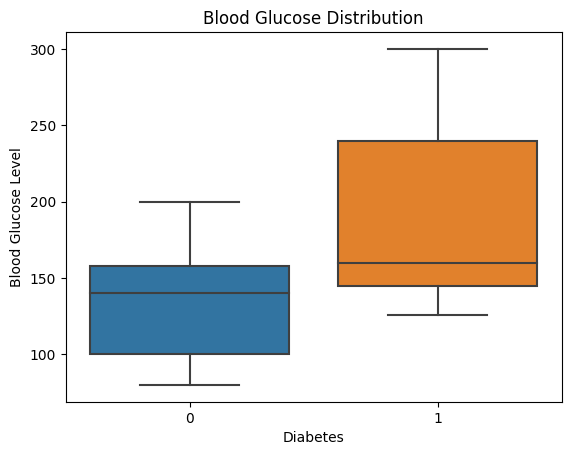

In [31]:
sns.boxplot(x=df['diabetes'], y=df['blood_glucose_level'])
plt.title('Blood Glucose Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.show()

**Correlation Heatmap**

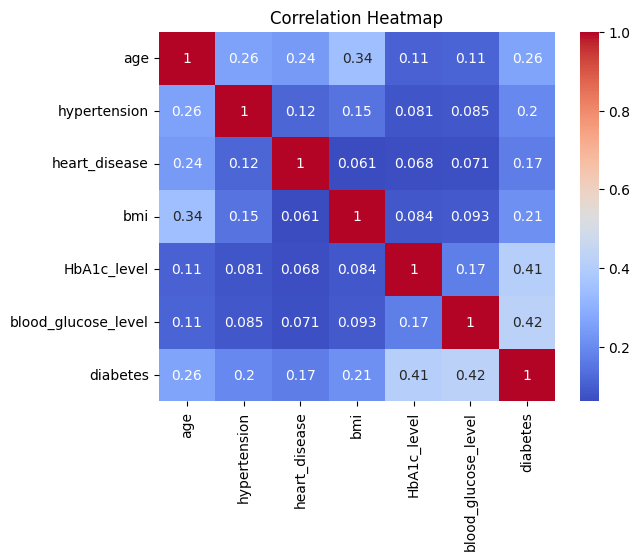

In [32]:
corr = df[['age', 'hypertension', 'heart_disease',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Doing One-Hot Encoding of 'gender' and 'smoking_history' columns**

In [33]:
dummy_df = pd.get_dummies(df[["gender","smoking_history"]], drop_first=True)
dummy_df.head()

,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0


**Concatinating One-Hot Encoding columns with other columns**

In [34]:
X = pd.concat([df[['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']],dummy_df], axis=1)
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,1,0,1,0,0,0,0


**Scaling X**

In [35]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X[0]

array([1.        , 0.        , 1.        , 0.17717087, 0.56363636,
       0.27272727, 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        ])

**Defining y**

In [36]:
y = df['diabetes']

**Value Counts of y; is person diabetic or not**

In [37]:
y.value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

**SMOTE**

In [38]:
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

y.value_counts()

0    87664
1    87664
Name: diabetes, dtype: int64

**Defining with different algorithms with there parameters**

In [39]:
algos = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best','random']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50],
            'criterion': ['gini', 'entropy', 'log_loss']
        }
    },
    'ada_boost_classifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50,100]
        }
    },
    'gradient_boosting_classifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50,100],
            'loss': ['log_loss', 'exponential']
        }
    },
    'bagging_classifier': {
        'model': BaggingClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50]
        }
    },
    'gaussian_naive_bayes': {
        'model': GaussianNB(),
        'params': {
        }
    },
    'multinomial_naive_bayes': {
        'model': MultinomialNB(),
        'params': {
        }
    }
}

**Training all algorithms and finding best parameter and saving model score in 'scores'**

In [40]:
scores= []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
for algo_name, mp in algos.items():
   reg = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
   reg.fit(X, y)
   scores.append(
      {
         'model': algo_name,
         'best_score': reg.best_score_,
         'best_params': reg.best_params_
      }
   )

**Creating DataFrame with 'scores' list**

In [41]:
score = pd.DataFrame(scores, columns=['model','best_score','best_params'])
score

,model,best_score,best_params
0,logistic_regression,0.886015,{}
1,SVM,0.896435,{}
2,decision_tree,0.964553,"{'criterion': 'entropy', 'splitter': 'best'}"
3,random_forest,0.975948,"{'criterion': 'entropy', 'n_estimators': 50}"
4,ada_boost_classifier,0.955524,{'n_estimators': 100}
5,gradient_boosting_classifier,0.957822,"{'loss': 'log_loss', 'n_estimators': 100}"
6,bagging_classifier,0.976610,{'n_estimators': 50}
7,gaussian_naive_bayes,0.643889,{}
8,multinomial_naive_bayes,0.616523,{}


**Split X and y**

In [42]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

In [43]:
X_test, X_valid, y_test, y_valid = train_test_split(X_rem, y_rem, test_size=0.33, random_state=10, stratify=y_rem)

**Training our model**

In [44]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy')

model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

**Accuracy Score**

In [45]:
model.score(X_test, y_test)

0.9740075480264465

Predicting for X_valid

In [46]:
y_pred = model.predict(X_valid)

**Confusion Matrix**

In [47]:
cm = confusion_matrix(y_valid, y_pred)
cm

array([[8461,  218],
       [ 217, 8462]])

**Heatmap of Confusion Matrix**

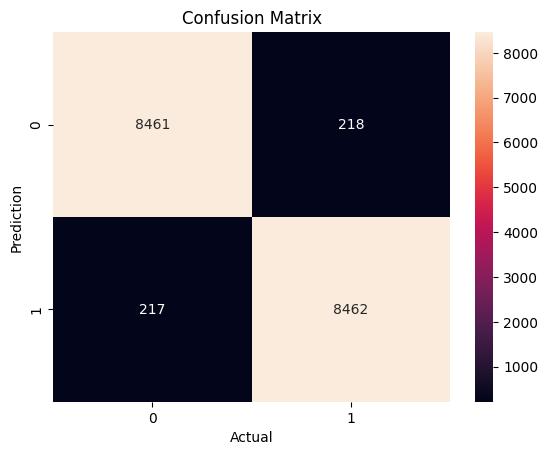

In [48]:
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

**Classification Report**

In [49]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8679
           1       0.97      0.97      0.97      8679

    accuracy                           0.97     17358
   macro avg       0.97      0.97      0.97     17358
weighted avg       0.97      0.97      0.97     17358



**Principal Component Analysis(PCA)**

For reducing dimensions of dataset

In [50]:
pca = PCA(0.95)

X_pca = pca.fit_transform(X)

**Shape of X after PCA**

In [51]:
X_pca.shape

(175328, 10)

**Training our model**

In [52]:
X_train, X_rem, y_train, y_rem = train_test_split(X_pca, y, test_size=0.3, random_state=10, stratify=y)
X_test, X_valid, y_test, y_valid = train_test_split(X_rem, y_rem, test_size=0.33, random_state=10, stratify=y_rem)
model = RandomForestClassifier(n_estimators=100, criterion='entropy')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.947107062796175

**Confusion Matrix**

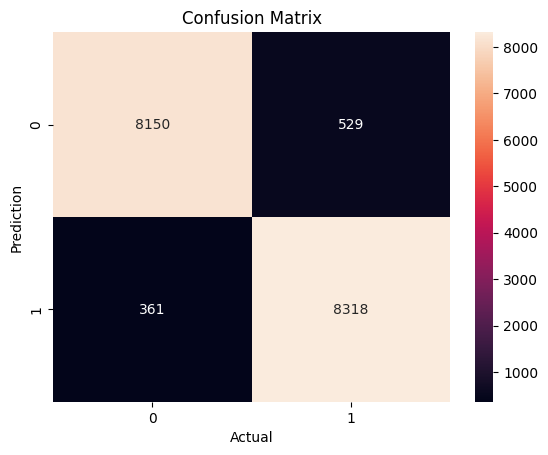

In [53]:
y_pred = model.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)

sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

**Classification Report**

In [54]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8679
           1       0.94      0.96      0.95      8679

    accuracy                           0.95     17358
   macro avg       0.95      0.95      0.95     17358
weighted avg       0.95      0.95      0.95     17358

